<a href="https://colab.research.google.com/github/TomShimo0/COMP34212-Lab/blob/main/COMP34212_Lab_topology_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Advanced Convolutional Neural Networks (CNNs) with CIFAR-10 dataset
=========

In this tutorial we will learn how to use more complex CNNs, showing that the training of a __deeper__ CNN can improve the performance of the model. We will also explore the concept of __data augmentation__ to understand how to increase the variability of the training set by, for example, rotating the original images to generate new training stimuli.

This tutorail will use the CIFAR-10 training set.


**CNN for CIFAR-10**

To work with more complex CNNs, we will now use a more complex training dataset called __CIFAR-10__. https://www.cs.toronto.edu/~kriz/cifar.html . CIFAR-10 is a benchamark machine learning set of low-resolution, colour images. It includes 60000 32x32 colour (using 3 RGB colour channels) images in these 10 classes of objects: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. Each class has 6000. There are 50000 training images and 10000 test images. This dataset is enclosed in the default Anaconda KERAS package.


**Initialisation of the program**

The program starts with the importing of typical Keras and other Python service modules.

In [ ]:
# importing of modules for CIFAR-10 CNN
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [ ]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 40
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images

In [ ]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


__CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [ ]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Topology experiments
-------------

The original network provided was of the structure:

conv+conv+maxpool+dropout+conv+conv+maxpool+droupout+[classification]

I would like to compare this to the performance of:

conv+conv+maxpool+dropout+[classification]    (only one layer)

and

conv+conv+maxpool+dropout+conv+conv+maxpool+dropout+conv+conv+maxpool+dropout+[classification]     (one more layer)


[classification] is the standard classification layer:
dense+dropout+dense

All the layers will use the reLu function, except the final one with the Softmax function necessary for the categorical classification


In [ ]:
# Complex DNN model definition (standard)
modelS = Sequential()

modelS.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
modelS.add(Activation('relu'))
modelS.add(Conv2D(32, kernel_size=3, padding='same'))
modelS.add(Activation('relu'))
modelS.add(MaxPooling2D(pool_size=(2, 2)))
modelS.add(Dropout(0.25))

modelS.add(Conv2D(64, kernel_size=3, padding='same'))
modelS.add(Activation('relu'))
modelS.add(Conv2D(64, 3, 3))
modelS.add(Activation('relu'))
modelS.add(MaxPooling2D(pool_size=(2, 2)))
modelS.add(Dropout(0.25))

modelS.add(Flatten())
modelS.add(Dense(512))
modelS.add(Activation('relu'))
modelS.add(Dropout(0.5))
modelS.add(Dense(N_CLASSES))
modelS.add(Activation('softmax'))


#optim = Adam() default values
modelS.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

#model.summary()

In [ ]:
# Complex DNN model definition (1 less layers)
modelL = Sequential()

modelL.add(Conv2D(64, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
modelL.add(Activation('relu'))
modelL.add(Conv2D(64, kernel_size=3, padding='same'))
modelL.add(Activation('relu'))
modelL.add(MaxPooling2D(pool_size=(2, 2)))
modelL.add(Dropout(0.25))

modelL.add(Flatten())
modelL.add(Dense(512))
modelL.add(Activation('relu'))
modelL.add(Dropout(0.5))
modelL.add(Dense(N_CLASSES))
modelL.add(Activation('softmax'))


#optim = Adam() default values
modelL.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

#modelL.summary()

In [ ]:
# Complex DNN model definition (1 more layers)
modelM = Sequential()

modelM.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
modelM.add(Activation('relu'))
modelM.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
modelM.add(Activation('relu'))
modelM.add(MaxPooling2D(pool_size=(2, 2)))
modelM.add(Dropout(0.25))

modelM.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
modelM.add(Activation('relu'))
modelM.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
modelM.add(Activation('relu'))
modelM.add(MaxPooling2D(pool_size=(2, 2)))
modelM.add(Dropout(0.25))

modelM.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
modelM.add(Activation('relu'))
modelM.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
modelM.add(Activation('relu'))
modelM.add(MaxPooling2D(pool_size=(2, 2)))
modelM.add(Dropout(0.25))

modelM.add(Flatten())
modelM.add(Dense(512))
modelM.add(Activation('relu'))
modelM.add(Dropout(0.5))
modelM.add(Dense(N_CLASSES))
modelM.add(Activation('softmax'))

modelM.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

#model.summary()

**Training of the deeper CNNs**

Let's train (fit) these models.



In [ ]:
# make a list of models
models = [modelS, modelL, modelM]
histories = []
scores = []
model_names = ['base', 'less', 'more']
score_colours = ['r', 'g', 'b']

In [ ]:
# training/fitting of the complex DNN models, recording data in lists
for model in models:
  history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
  histories.append(history)

  # evaluation on test set
  score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
  scores.append(score)
  print("\nTest score/loss:", score[0])
  print('Test accuracy:', score[1])


Epoch 1/40
313/313 [==============================] - 11s 16ms/step - loss: 1.8982 - accuracy: 0.2860 - val_loss: 1.6419 - val_accuracy: 0.3832
Epoch 2/40
313/313 [==============================] - 4s 12ms/step - loss: 1.5710 - accuracy: 0.4155 - val_loss: 1.3980 - val_accuracy: 0.4873
Epoch 3/40
313/313 [==============================] - 4s 12ms/step - loss: 1.4063 - accuracy: 0.4824 - val_loss: 1.2635 - val_accuracy: 0.5402
Epoch 4/40
313/313 [==============================] - 4s 12ms/step - loss: 1.2907 - accuracy: 0.5322 - val_loss: 1.1624 - val_accuracy: 0.5834
Epoch 5/40
313/313 [==============================] - 4s 13ms/step - loss: 1.2237 - accuracy: 0.5593 - val_loss: 1.1306 - val_accuracy: 0.6050
Epoch 6/40
313/313 [==============================] - 4s 12ms/step - loss: 1.1524 - accuracy: 0.5892 - val_loss: 1.0500 - val_accuracy: 0.6291
Epoch 7/40
313/313 [==============================] - 4s 12ms/step - loss: 1.1164 - accuracy: 0.6000 - val_loss: 1.0062 - val_accuracy: 0.646

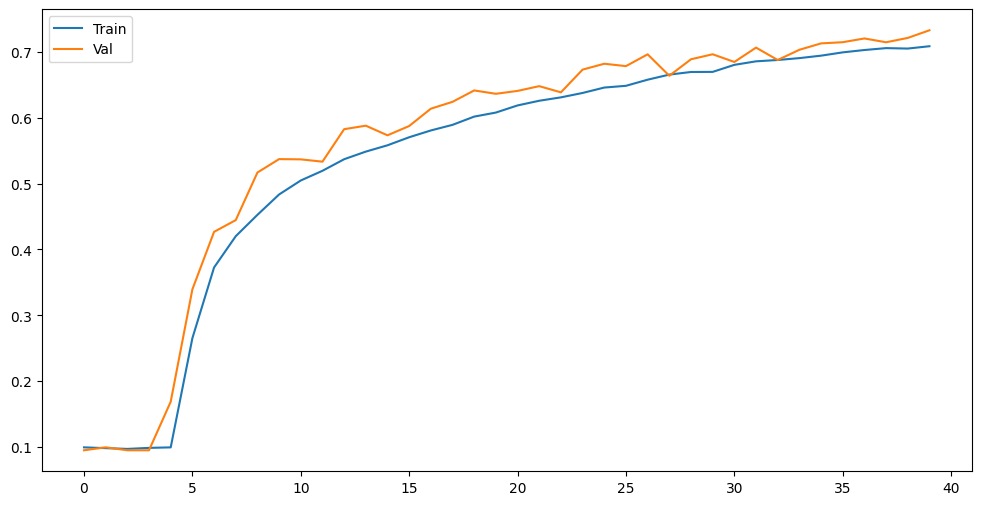

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(histories[2].history['accuracy'], label=f'Train')
plt.plot(histories[2].history['val_accuracy'], label=f'Val')
plt.legend(loc='best')
plt.show()

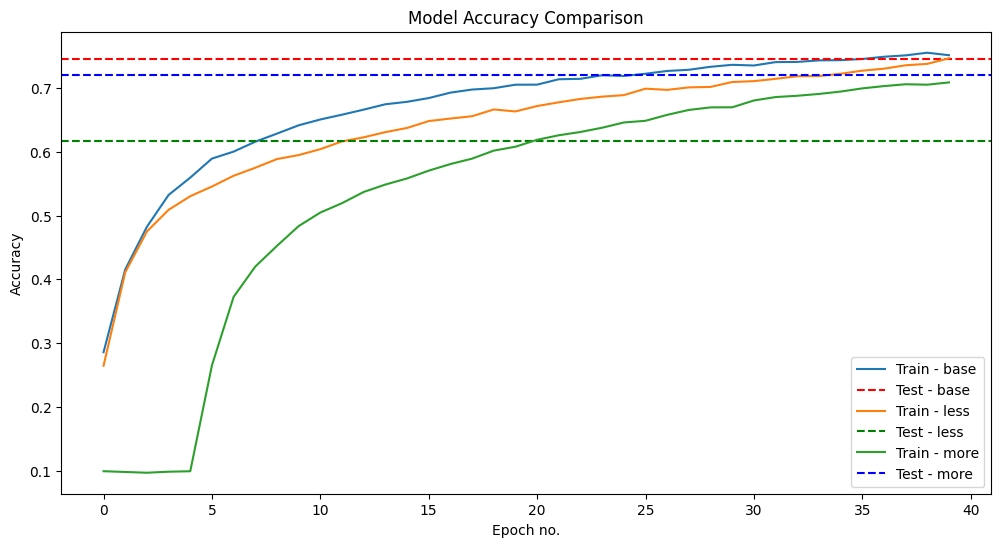

In [ ]:
plt.figure(figsize=(12, 6))
for history, score, model_name, score_colour in zip(histories, scores, model_names, score_colours):
  plt.plot(history.history['accuracy'], label=f'Train - {model_name}')
  plt.axhline(y=score[1], color = score_colour, linestyle='--', label=f'Test - {model_name}')


plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch no.')
plt.legend(loc ='best')
plt.show()

**Analysis of the Deeper CNN results**

This generates the test scores and plots for the new, deeper DNN.


79/79 [==============================] - 0s 5ms/step - loss: 0.8110 - accuracy: 0.7200

Test score/loss: 0.8110026121139526
Test accuracy: 0.7200000286102295
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


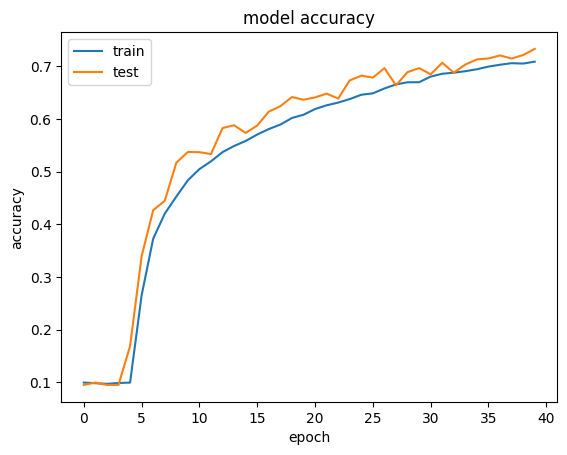

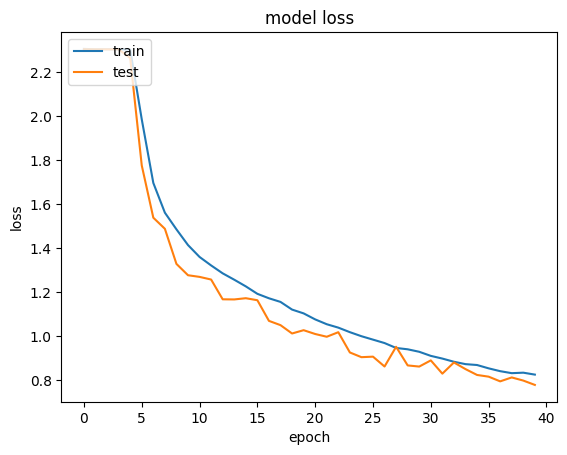

In [ ]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()